## Naive Bayes: Movie Reviews Sentiment Analysis

```mermaid
flowchart TD
Start([Start])
LoadData[Load Movie Reviews Dataset]
SplitData[Split Data into Training and Testing Sets]
Vectorize[Vectorize Text Data using CountVectorizer]
TrainModel[Train Multinomial Naive Bayes Classifier]
Predict[Make Predictions on Test Set]
Evaluate[Evaluate Model Performance using Confusion Matrix and Classification Report]
Display[Display Sample Misclassified Reviews]
End([End])

subgraph Preprocessing
    LoadData --> SplitData --> Vectorize
end
subgraph Modeling
    Vectorize --> TrainModel
end
subgraph Evaluation
    TrainModel --> Predict --> Evaluate --> Display
end

Start --> LoadData
Display --> End
```

This notebook will walk through the process of classifying movie reviews as positive or negative using a Naive Bayes classifier.

Datasource: [Kaggle IMDB Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

The main steps are:
1.  **Load Data**: Load the movie reviews dataset from the CSV file.
2.  **Preprocess Data**: Split the data into training and testing sets and convert the text reviews into numerical vectors.
3.  **Train Model**: Train a Multinomial Naive Bayes classifier on the training data.
4.  **Evaluate Model**: Make predictions on the test set and evaluate the model's performance using a confusion matrix and classification report.
5.  **Analyze Results**: Display some of the reviews that were misclassified by the model to understand its failure modes.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Load Data

In [2]:
def load_imdb_data(file_path):
    """
    Load the IMDB dataset from a CSV file.
    IN: file_path, str, path to the CSV file
    OUT: df, pd.DataFrame, loaded data
    """
    # Your code here
    df=pd.read_csv(file_path)
    return df

In [3]:
if __name__ == "__main__":
    file_path = "IMDB Dataset.csv"
    df = load_imdb_data(file_path)
    print("IMDB data loaded successfully.")
    print("Dataset shape:", df.shape)
    print("Columns:", df.columns)
    print("Sentiment distribution:\n", df['sentiment'].value_counts())

IMDB data loaded successfully.
Dataset shape: (50000, 2)
Columns: Index(['review', 'sentiment'], dtype='object')
Sentiment distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


### Task 2: Preprocessing

#### Subtask 2.1: Split Data into Train and Test Sets

In [8]:
def split_data(df, train_proportion, test_proportion, random_state=None):
    """
    Split the data into training and testing sets.
    IN: df, pd.DataFrame, the entire dataset
        train_proportion, float, proportion of samples for the training set
        test_proportion, float, proportion of samples for the test set
        random_state, int, seed for random number generator
    OUT: X_train, X_test, y_train, y_test
    """

    # Separate features (X) and labels (y)
    X = df["review"]
    y = df["sentiment"]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=train_proportion,
        test_size=test_proportion,
        random_state=random_state
    )

    return X_train, X_test, y_train, y_test

In [9]:
if __name__ == "__main__":
    train_proportion, test_proportion = 0.8, 0.2
    X_train, X_test, y_train, y_test = split_data(
        df,
        train_proportion=train_proportion,
        test_proportion=test_proportion,
        random_state=42,
    )
    print("Data split into training and testing sets.")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

Data split into training and testing sets.
X_train shape: (40000,)
X_test shape: (10000,)


#### Subtask 2.2: Vectorize Text Data using CountVectorizer

We will use `CountVectorizer` to convert the text data into a matrix of token counts. This is a necessary step to prepare the data for the Naive Bayes classifier.

Use the keyword argument `stop_words='english'` to remove common English stop words from the text data. Stop words are frequently occurring words (like "the", "and", "is") that may not carry significant meaning and can be removed to improve model performance.

Reference: [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [10]:
def fit_vectorizer(X_train):
    """
    Vectorize the text data using CountVectorizer.
    IN: X_train, pd.Series, training text data
    OUT: X_train_vec, scipy.sparse.csr_matrix, vectorized training data
    """
    # Your code here
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    return X_train_vec, vectorizer

In [11]:
def transform_test_data(vectorizer, X_test):
    """
    Transform the test data using the fitted vectorizer.
    IN: vectorizer, CountVectorizer, fitted vectorizer
        X_test, pd.Series, testing text data
    OUT: X_test_vec, scipy.sparse.csr_matrix, vectorized testing data
    """
    # Your code here
    X_test_vec = vectorizer.transform(X_test)
    return X_test_vec

In [13]:
if __name__ == "__main__":
    X_train_vec, vectorizer = fit_vectorizer(X_train)
    X_test_vec = transform_test_data(vectorizer, X_test)
    print("Text data vectorized.")
    print("X_train_vec shape:", X_train_vec.shape)
    print("X_test_vec shape:", X_test_vec.shape)

Text data vectorized.
X_train_vec shape: (40000, 93003)
X_test_vec shape: (10000, 93003)


### Task 3: Train Multinomial Naive Bayes Classifier

In [14]:
def train_nb_classifier(X_train_vec, y_train):
    """
    Train a Multinomial Naive Bayes classifier.
    IN: X_train_vec, scipy.sparse.csr_matrix, vectorized training data
        y_train, pd.Series, training labels
    OUT: model, trained MultinomialNB classifier
    """
    # Your code here
    model = MultinomialNB()
    model.fit(X_train_vec, np.ravel(y_train))
    return model

In [15]:
if __name__ == "__main__":
    nb_model = train_nb_classifier(X_train_vec, y_train)
    print("Multinomial Naive Bayes model trained successfully.")

Multinomial Naive Bayes model trained successfully.


### Task 4: Evaluate Model Performance

#### Subtask 4.1: Make Predictions on Test Set

In [16]:
def make_predictions(model, X_test_vec):
    """
    Make predictions on the test set.
    IN: model, trained classifier
        X_test_vec, scipy.sparse.csr_matrix, vectorized testing data
    OUT: y_pred, np.ndarray, predicted labels
    """
    # Your code here
    y_pred = model.predict(X_test_vec)
    return y_pred

In [17]:
if __name__ == "__main__":
    y_pred = make_predictions(nb_model, X_test_vec)
    print("Predictions made on the test set.")

Predictions made on the test set.


#### Subtask 4.2: Evaluate Model Performance using Confusion Matrix and Classification Report

References: 
- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [18]:
def compute_metrics(y_true, y_pred):
    """
    Compute the confusion matrix and classification report.
    IN: y_true, pd.Series, true labels
        y_pred, np.ndarray, predicted labels
    OUT: cm, np.ndarray, confusion matrix
         report, str, classification report
    """
    # Your code here
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    return cm, report

In [23]:
def plot_confusion_matrix(cm, class_names):
    """
    Plot the confusion matrix.
    IN: cm, np.ndarray, confusion matrix
        class_names, list of str, names of the classes
    OUT: None
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap="Blues")
    plt.colorbar()

    # Label ticks
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add numbers inside matrix
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i, j],
                     ha="center", va="center",
                     color="white" if cm[i, j] > cm.max()/2 else "black")

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.88      0.85      4961
    positive       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



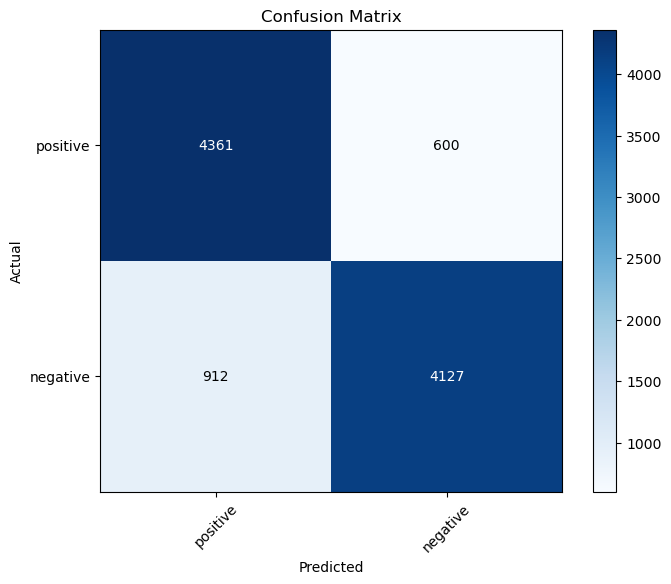

In [24]:
if __name__ == "__main__":
    cm, report = compute_metrics(y_test, y_pred)
    print("Classification Report:\n", report)
    plot_confusion_matrix(cm, class_names=['positive', 'negative'])

#### Subtask 4.3: Display Misclassified Reviews

In [41]:
def find_misclassified_reviews(y_true, y_pred, X_test):
    """
    Find misclassified reviews.
    IN: y_true, pd.Series, true labels
        y_pred, np.ndarray, predicted labels
        X_test, pd.Series, testing data
    OUT: misclassified_reviews, pd.DataFrame, containing misclassified reviews with their true and predicted labels
    """
    misclassified_indices = np.where(y_true != y_pred)[0]
    misclassified_reviews = X_test.iloc[misclassified_indices].to_frame(name='review')
    misclassified_reviews['true_label'] = y_true.iloc[misclassified_indices].values
    misclassified_reviews['predicted_label'] = y_pred[misclassified_indices]

    return misclassified_reviews

In [42]:
def display_misclassified_reviews(df, num_samples=5):
    """
    Display some of the misclassified reviews.
    IN: df, pd.DataFrame, misclassified reviews
        num_samples, int, number of samples to display
    OUT: None
    """
    pd.set_option('display.max_colwidth', None)
    print("Displaying sample misclassified reviews:")
    display(df.head(num_samples))

In [43]:
if __name__ == "__main__":
    misclassified_df = find_misclassified_reviews(y_test, y_pred, X_test)
    display_misclassified_reviews(misclassified_df, num_samples=5)

Displaying sample misclassified reviews:


,review,true_label,predicted_label
49498,"Okay, I didn't get the Purgatory thing the first time I watched this episode. It seemed like something significant was going on that I couldn't put my finger on. This time those Costa Mesa fires on TV really caught my attention- and it helped that I was just writing an essay on Inferno! But let me see what HASN'T been discussed yet...<br /><br />A TWOP review mentioned that Tony had 7 flights of stairs to go down because of the broken elevator. Yeah, 7 is a significant number for lots of reasons, especially religious, but here's one more for ya. On a hunch I consulted wikipedia, and guess what Dante divided into 7 levels? Purgatorio. Excluding ante-Purgatory and Paradise. (The stuff at the bottom of the stairs and... what Tony can't get to.) <br /><br />On to the allegedly ""random"" monk-slap scene. As soon as the monks appeared, it fit perfectly in place with Tony trying to get out of Purgatory. You can tell he got worried when that Christian commercial (death, disease, and sin) came on, and he's getting more and more desperate because Christian heaven is looking kinda iffy for him. By the time he meets the monks he's thinking ""hey maybe these guys can help me?"" which sounds like contemplating other religions (e.g. Buddhism) and wondering if some other path could take him to ""salvation"". Not that Tony is necessarily literally thinking about becoming a Buddhist, but it appears Finnerty tried that (and messed up). That slap in the face basically tells Tony there's no quick fix- as in, no, you can't suddenly embrace Buddhism and get out of here. <br /><br />Tony was initially not too concerned about getting to heaven. But at the ""conference entrance"", he realizes that's not going to be so easy for him. At first I saw the name vs. driver's license problem as Tony having led sort of a double life, what with the killing people and sleeping around that he kept secret from most people. He feels free to have an affair with quasi-Melfi because ""he's Kevin Finnerty"". He figures out that he CAN fool some people with KF's cards, like hotel receptionists, but it won't get him out of Purgatory. Those helicopters- the helicopters of Heaven?- are keeping track of him and everything he does.<br /><br />After reading all the theories on ""inFinnerty"", though, it seems like KF's identity is a reminder of the infinite different paths Tony could've taken in his life. Possibly along with the car joke involving Infiniti's that made no sense to me otherwise. Aaaand at that point my brain fizzles out.",positive,negative
12144,"I can't help but notice the negative reviews this movie has gotten. To be honest, I saw the preview for this movie, and the premise looked intrigued me. Yes, I rented it after reading others' comments. They are correct in that some of the acting leaves a lot to be desired. They are also correct that one of the best performances of this movie was that of Dr. Graves.<br /><br />Also interesting is Scott Clark, who plays Grant, the kid in the wheelchair. I identify with the character he played, perhaps because I am in a wheelchair.<br /><br />This movie is certainly worth your looking at.",positive,negative
15118,"This movie was released originally as a soft ""X"", apparently with the explicit sex deleted. Later, the producers ""relented"" (smelled money) and re-released it with the excised scenes restored (apparently only about 3 minutes). I guess since Kristine was of age, it was held against her and her promising career came grinding to a halt. I guess its all in the timing (witness Pam Anderson's career)--but Ronald Reagan was in charge during Kristine's debacle (we had not heard about Nancy Reagan's affairs), Bill Clinton and Monica Lewinski were in full swing during Pam's ""coming out"".<br /><br />The sex is just icing on the cake, both version satisfy. This naughty musical is way above similar of others that were released at the same time.",positive,negative
13466,"With al